Experiment with OpenCV for finding the pool table edges within an image

In [115]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def ImgShow(images):
    cnt = len(images)
    cols = cnt
    rows = 1
    fig, ax = plt.subplots(rows, cols)
    for i in range(0, len(images)):
        plt.axis('off')
        plt.rcParams['figure.dpi'] = 200
        imgDisp = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        ax[i].imshow(imgDisp)
    

In [116]:
# Load the test image
imageOriginal = cv.imread("../test/images/IMG_4430.jpg")

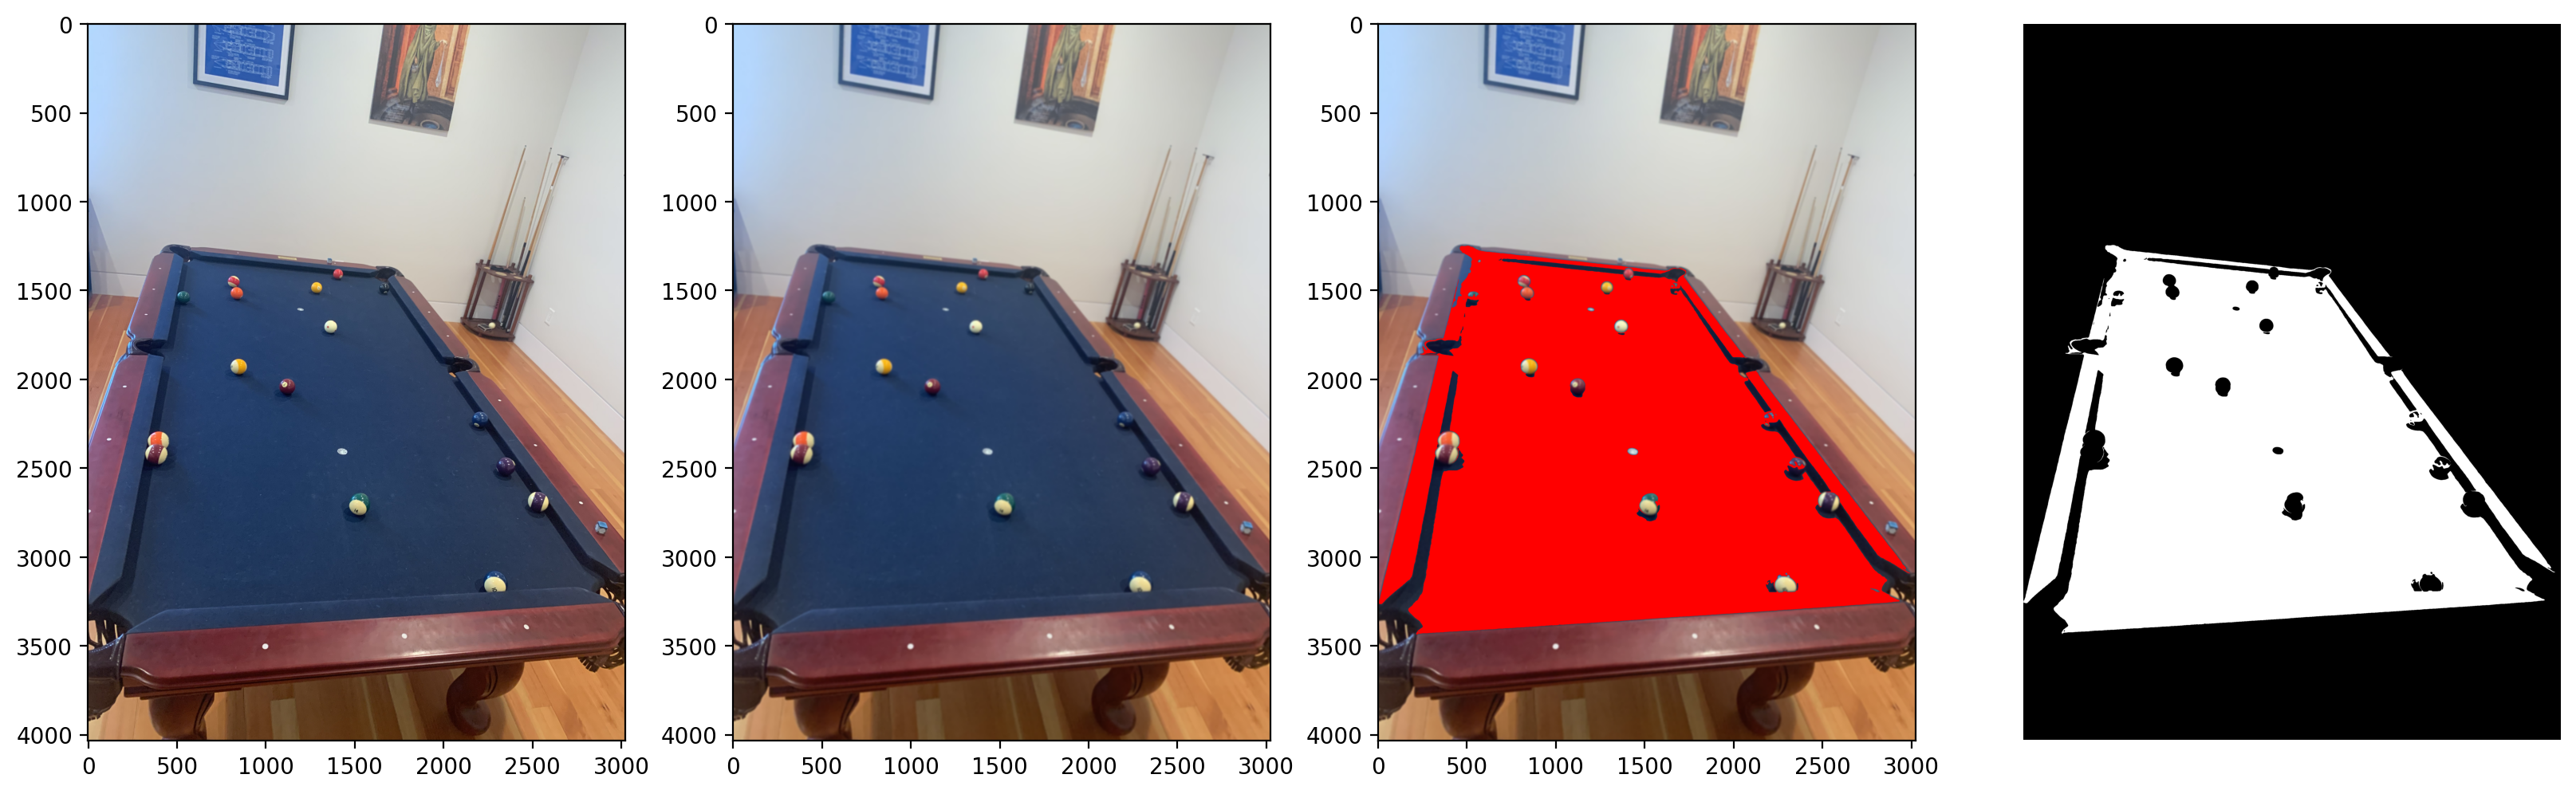

In [126]:
#Find the edges using flood, start with a blur
imageBlur = cv.GaussianBlur(imageOriginal, (25,25), cv.BORDER_DEFAULT)

imageFlood = imageBlur.copy()
cols = imageFlood.shape[1]
rows = imageFlood.shape[0]
seed = (int(cols / 2), int(rows / 2)) # a point in the middle

imageFloodMask = np.zeros((rows+2,cols+2,1), np.uint8)
tolerance = 32.0
diff = (tolerance,tolerance,tolerance)
#flags = 8 | cv.FLOODFILL_MASK_ONLY | 1 << 8
flags = 8 | cv.FLOODFILL_FIXED_RANGE | 255 << 8
res = cv.floodFill(imageFlood, imageFloodMask, seed, (0,0,255),diff,diff, flags)

ImgShow([imageOriginal, imageBlur, imageFlood, imageFloodMask])

Find the line segments

In [138]:
#Create default parametrization LSD
lsd = cv.createLineSegmentDetector(0)

canny = cv.Canny(imageFloodMask, 100, 175)

#Detect lines in the image
lines = lsd.detect(canny)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
for l in lines:
    x0 = l[0][0]
    y0 = l[0][1]
    x1 = l[1][0]
    y1 = l[1][1]
    cv.line(canny, (x0, y0), (x1,y1), 255, 1, cv.LINE_AA)
    
#imageWithLines = lsd.drawSegments(imageFlood, lines)
#ImgShow([canny])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [140]:
img = canny
LSD = cv.createLineSegmentDetector()

if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

lines, width, prec, nfa = LSD.detect(img)
edgeMap = LSD.drawSegments(np.zeros_like(img), lines)[..., -1]
lines = np.squeeze(lines, 1)
#edgeList = np.concatenate([lines, width, prec, nfa], 1)
ImgShow(edgeMap)